# 1. Import Necessary Modules

In [3]:
#importing necessary modules required for this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import LabelEncoder

# 2. Load The Dataset

In [5]:
# loading the dataset "Given_Dataset"

data=pd.read_csv("Given_Dataset.csv")

# 3. Dataset Features

In [8]:
# shape of the dataset "Given_Dataset"

data.shape

(583, 11)

In [10]:
# displaying first five records of the dataset "Given_Dataset"

data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [12]:
# displaying last five records of the dataset "Given_Dataset"

data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


# 4. Data Preprocessing

In [17]:
# Dropping unnecessary columns

print("There is no uncessary columns to drop")

There is no uncessary columns to drop


In [19]:
# Selecting Target Columns

print("Here \"Dataset\" column is target column")

Here "Dataset" column is target column


In [22]:
# Selecting independent columns

print("Except \"Dataset\" column all other columns are independent columns")

Except "Dataset" column all other columns are independent columns


In [37]:
# Displaying the info of dataset "Given_Dataset"

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


# 4.1 Encoding

In [38]:
# Encoding The categorical column "Gender" into numerical column using label encoding

le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)

# Displaying the head of the dataset "Given_Dataset" after encoding

data.head()

# After Encoding In "Gender" column
# Female is 0 and Male is 1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# 4.2 Outlier Detection And Replacement

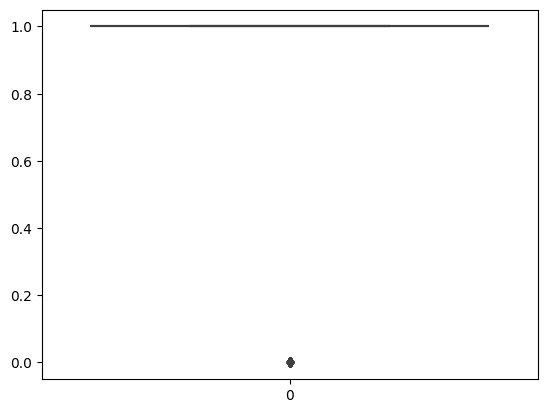

In [56]:
# Outlier Detection for each column in dataset "Given_Dataset"
# And replace outlier columns with their median value

# For "Gender" column

#Detection 
sns.boxplot(data.Gender)
plt.show()
# This column has no outliers

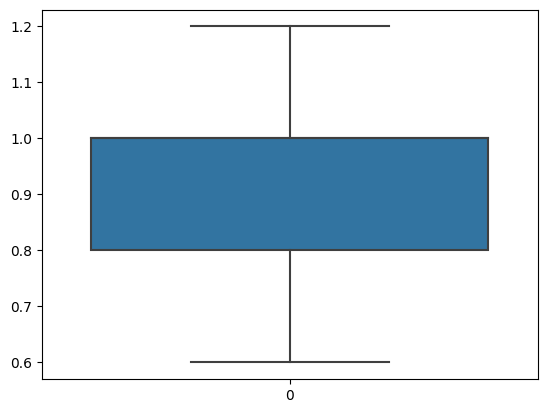

In [68]:
# For "Total_Bilirubin" column

#Detection
sns.boxplot(data.Total_Bilirubin)
plt.show()
# This column has outliers

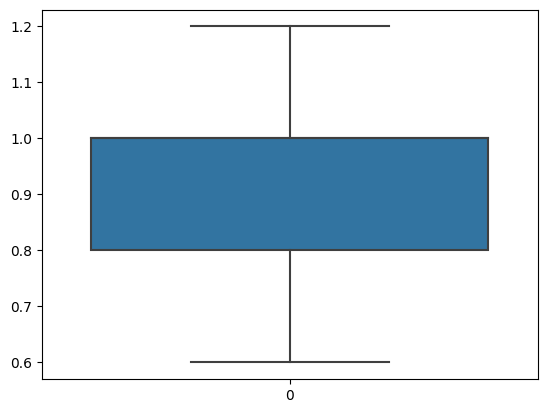

In [69]:
#Replacement
q11=data.Total_Bilirubin.quantile(0.25)
q13=data.Total_Bilirubin.quantile(0.75)
IQR1=q13-q11
upper_limit1=q13+1.5*IQR1
lower_limit1=q11-1.5*IQR1
data['Total_Bilirubin']=np.where(data['Total_Bilirubin']>upper_limit1,data['Total_Bilirubin'].median(),data['Total_Bilirubin'])
data['Total_Bilirubin']=np.where(data['Total_Bilirubin']<lower_limit1,data['Total_Bilirubin'].median(),data['Total_Bilirubin'])

#Boxplot after Outlier Replacement
sns.boxplot(data.Total_Bilirubin)
plt.show()

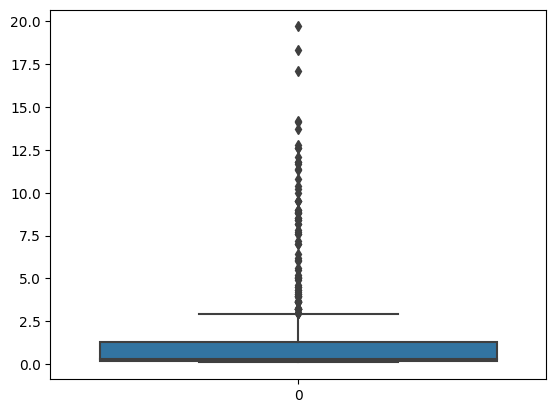

In [70]:
# For "Direct_Bilirubin" column

# Detection
sns.boxplot(data.Direct_Bilirubin)
plt.show()
# This column has outliers

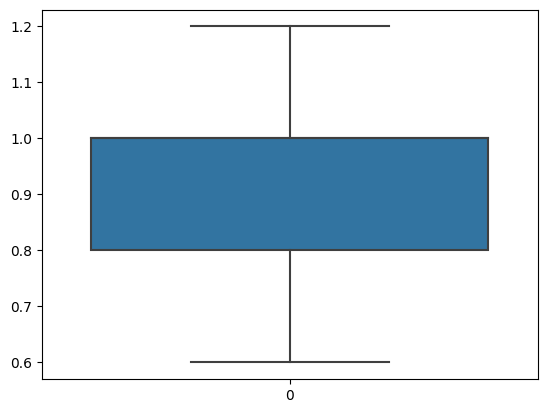

In [71]:
#Replacement
q21=data.Direct_Bilirubin.quantile(0.25)
q23=data.Direct_Bilirubin.quantile(0.75)
IQR2=q23-q21
upper_limit2=q23+1.5*IQR2
lower_limit2=q21-1.5*IQR2
data['Direct_Bilirubin']=np.where(data['Direct_Bilirubin']>upper_limit2,data['Direct_Bilirubin'].median(),data['Total_Bilirubin'])
data['Direct_Bilirubin']=np.where(data['Direct_Bilirubin']<lower_limit2,data['Direct_Bilirubin'].median(),data['Total_Bilirubin'])

#Boxplot after Outlier Replacement
sns.boxplot(data.Total_Bilirubin)
plt.show()

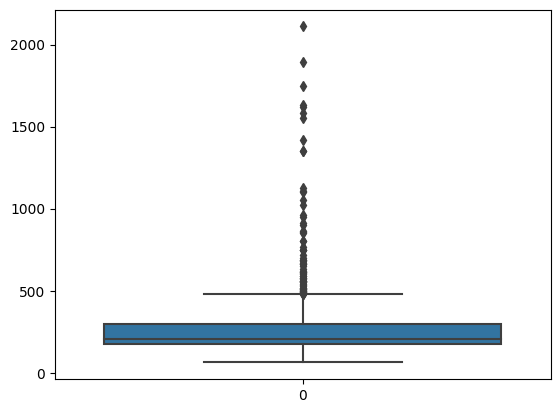

In [72]:
# For "Alkaline_Phosphotase" column

# Detection
sns.boxplot(data.Alkaline_Phosphotase)
plt.show()
# This column has outliers

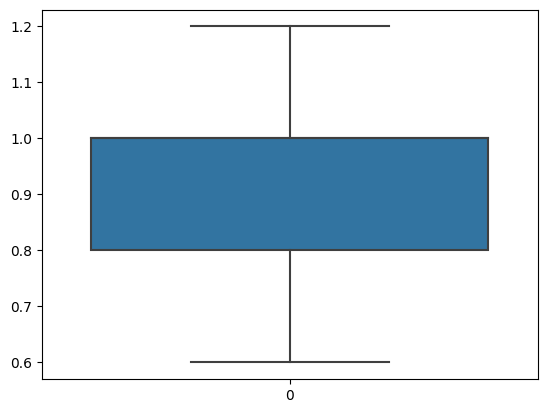

In [76]:
#Replacement
q31=data.Alkaline_Phosphotase.quantile(0.25)
q33=data.Alkaline_Phosphotase.quantile(0.75)
IQR3=q33-q31
upper_limit3=q33+1.5*IQR2
lower_limit3=q31-1.5*IQR2
data['Alkaline_Phosphotase']=np.where(data['Alkaline_Phosphotase']>upper_limit3,data['Alkaline_Phosphotase'].median(),data['Alkaline_Phosphotase'])
data['Alkaline_Phosphotase']=np.where(data['Alkaline_Phosphotase']<lower_limit3,data['Alkaline_Phosphotase'].median(),data['Alkaline_Phosphotase'])

#Boxplot after Outlier Replacement
sns.boxplot(data.Total_Bilirubin)
plt.show()

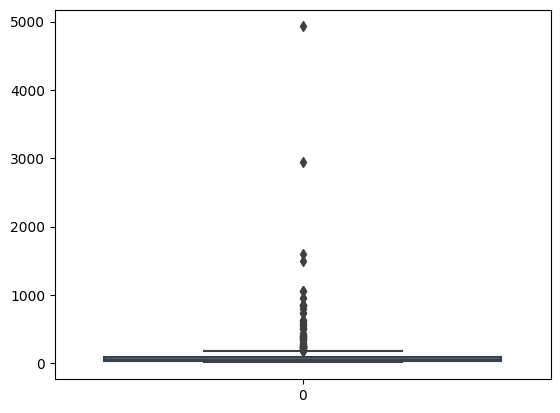

In [73]:
# For "Aspartate_Aminotransferase" column

# Detection
sns.boxplot(data.Aspartate_Aminotransferase)
plt.show()
# This column has outliers

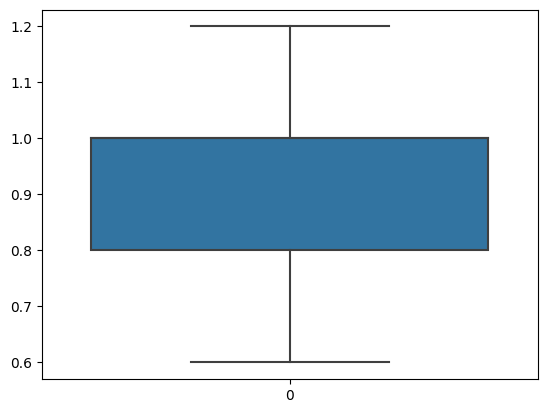

In [77]:
#Replacement
q41=data.Aspartate_Aminotransferase.quantile(0.25)
q43=data.Aspartate_Aminotransferase.quantile(0.75)
IQR4=q43-q41
upper_limit4=q43+1.5*IQR4
lower_limit4=q41-1.5*IQR4
data['Aspartate_Aminotransferase']=np.where(data['Aspartate_Aminotransferase']>upper_limit4,data['Aspartate_Aminotransferase'].median(),data['Aspartate_Aminotransferase'])
data['Aspartate_Aminotransferase']=np.where(data['Aspartate_Aminotransferase']<lower_limit4,data['Aspartate_Aminotransferase'].median(),data['Aspartate_Aminotransferase'])

#Boxplot after Outlier Replacement
sns.boxplot(data.Total_Bilirubin)
plt.show()

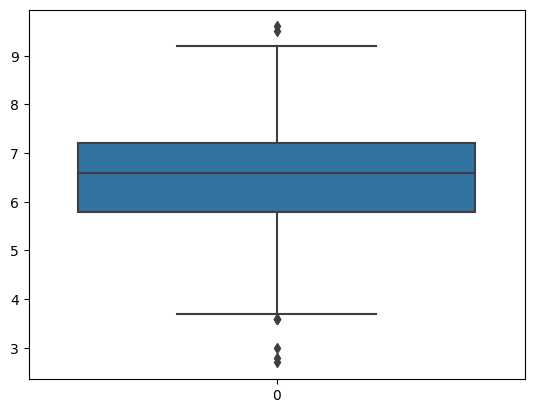

In [74]:
# For "Total_Protiens" column

# Detection
sns.boxplot(data.Total_Protiens)
plt.show()
# This column has outliers

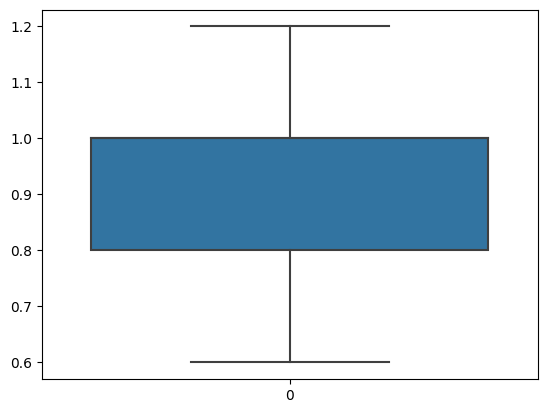

In [78]:
#Replacement
q51=data.Total_Protiens.quantile(0.25)
q53=data.Total_Protiens.quantile(0.75)
IQR5=q53-q51
upper_limit5=q53+1.5*IQR5
lower_limit5=q51-1.5*IQR5
data['Total_Protiens']=np.where(data['Total_Protiens']>upper_limit5,data['Total_Protiens'].median(),data['Total_Protiens'])
data['Total_Protiens']=np.where(data['Total_Protiens']<lower_limit5,data['Total_Protiens'].median(),data['Total_Protiens'])

#Boxplot after Outlier Replacement
sns.boxplot(data.Total_Bilirubin)
plt.show()

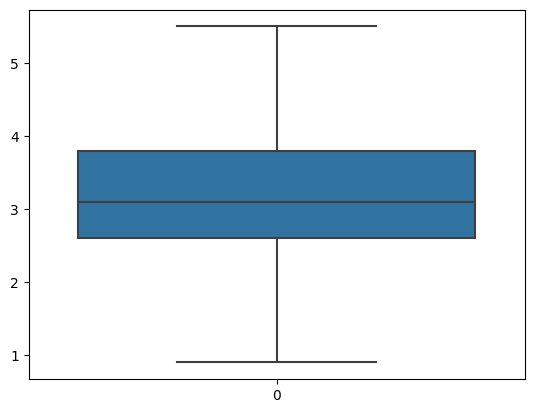

In [54]:
# For "Albumin" column

# Detection
sns.boxplot(data.Albumin)
plt.show()
# This column has no outliers

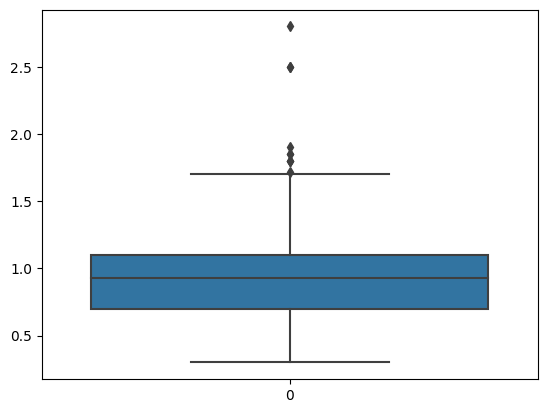

In [75]:
# For "Albumin_and_Globulin_Ratio" column

# Detection
sns.boxplot(data.Albumin_and_Globulin_Ratio)
plt.show()
# This column has outliers

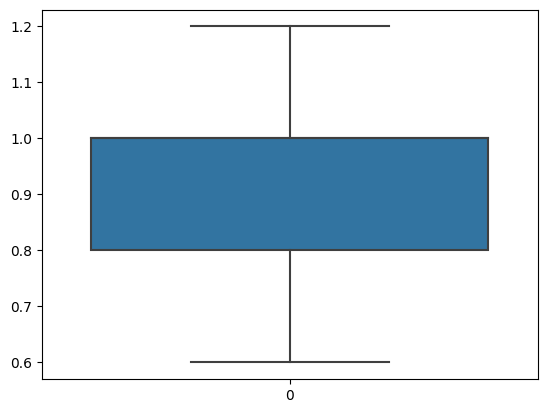

In [79]:
#Replacement
q61=data.Albumin_and_Globulin_Ratio.quantile(0.25)
q63=data.Albumin_and_Globulin_Ratio.quantile(0.75)
IQR6=q63-q61
upper_limit6=q63+1.5*IQR6
lower_limit6=q61-1.5*IQR6
data['Albumin_and_Globulin_Ratio']=np.where(data['Albumin_and_Globulin_Ratio']>upper_limit6,data['Albumin_and_Globulin_Ratio'].median(),data['Albumin_and_Globulin_Ratio'])
data['Albumin_and_Globulin_Ratio']=np.where(data['Albumin_and_Globulin_Ratio']<lower_limit6,data['Albumin_and_Globulin_Ratio'].median(),data['Albumin_and_Globulin_Ratio'])

#Boxplot after Outlier Replacement
sns.boxplot(data.Total_Bilirubin)
plt.show()

# 4.3 Descriptive Statistics

In [82]:
# Display the descriptive statistics of the dataset "Given_Dataset"

data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,0.893920,0.893920,214.698113,80.713551,49.210978,6.507890,3.141852,0.927686,1.286449
std,16.189833,0.429603,0.146716,0.146716,27.814211,182.620356,34.496303,1.016787,0.795519,0.279788,0.452490
min,4.000000,0.000000,0.600000,0.600000,174.000000,10.000000,10.000000,3.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.800000,206.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,1.000000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,1.000000,1.000000,210.000000,60.500000,58.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,1.200000,1.200000,298.000000,2000.000000,180.000000,9.200000,5.500000,1.700000,2.000000


# 4.4 Elimination of null values

In [84]:
# checking whether null value is present or not in each column

data.isnull().any()

# Column "Albumin_and_Globulin_Ratio" has null values

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [86]:
# total number of null values in each column

data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [90]:
# Filling null values with median

data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median(), inplace = True)

# checking for null values after replacement
data.isnull().any()

# THere is no null values

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

# 4.5 Unique and Value counts

In [93]:
# unique values and value counts of "Age" column

data.Age.unique()

array([65, 62, 58, 72, 46, 26, 29, 17, 55, 57, 64, 74, 61, 25, 38, 33, 40,
       51, 63, 34, 20, 84, 52, 30, 48, 47, 45, 42, 50, 85, 35, 21, 32, 31,
       54, 37, 66, 60, 19, 75, 68, 70, 49, 14, 13, 18, 39, 27, 36, 24, 28,
       53, 15, 56, 44, 41,  7, 22,  8,  6,  4, 43, 23, 12, 69, 16, 78, 11,
       73, 67, 10, 90], dtype=int64)

In [95]:
data.Age.value_counts()

60    34
45    25
50    23
42    21
38    21
      ..
78     1
11     1
67     1
10     1
90     1
Name: Age, Length: 72, dtype: int64

In [97]:
# unique values and value counts of "Gender" column

data.Gender.unique()

array([0, 1], dtype=int64)

In [99]:
data.Gender.value_counts()

1    441
0    142
Name: Gender, dtype: int64

In [101]:
# unique values and value counts of "Dataset" column

data.Dataset.unique()

array([1, 2], dtype=int64)

In [103]:
data.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

# 5. Data Visualizing

# 5.1 LinePlot of Each column

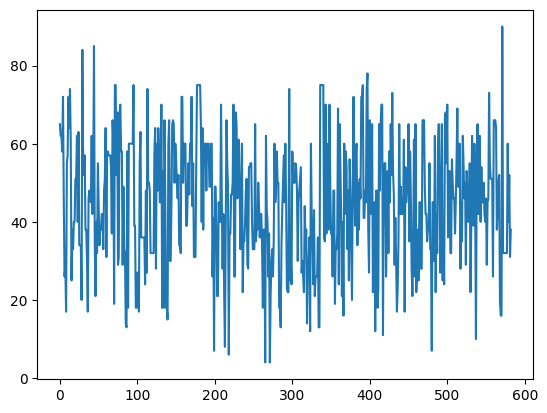

In [119]:
# "Age" COlumn 

plt.plot(data.Age)
plt.show()

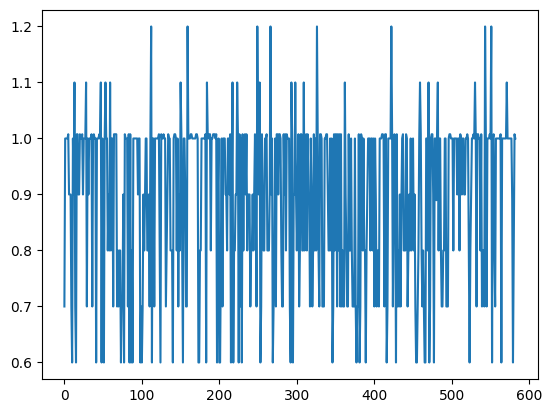

In [115]:
# "Total_Bilirubin" COlumn 

plt.plot(data.Total_Bilirubin)
plt.show()

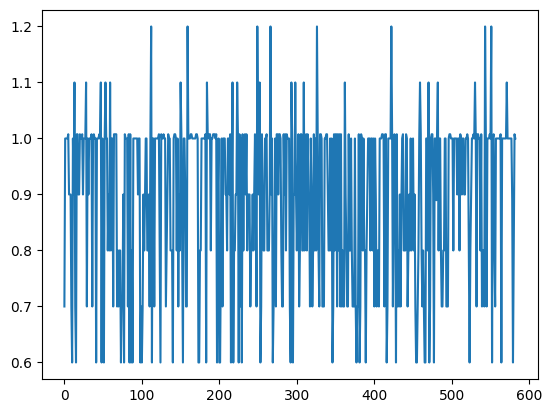

In [116]:
# "Direct_Bilirubin" COlumn 

plt.plot(data.Direct_Bilirubin)
plt.show()

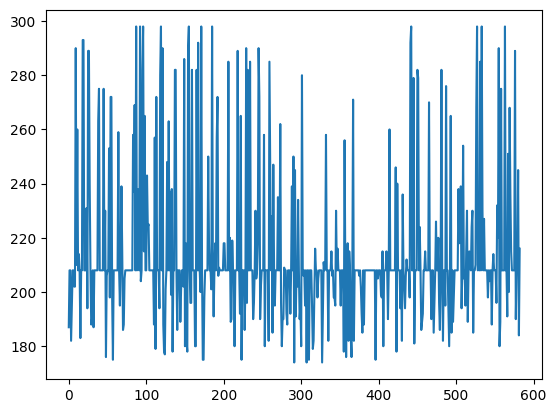

In [121]:
# "Alkaline_Phosphotase" COlumn 

plt.plot(data.Alkaline_Phosphotase)
plt.show()

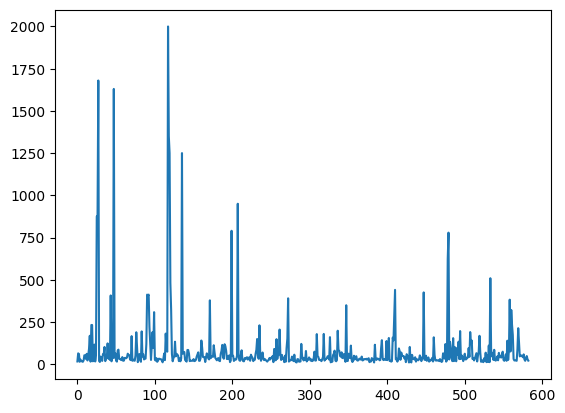

In [122]:
# "Alamine_Aminotransferase" COlumn 

plt.plot(data.Alamine_Aminotransferase)
plt.show()

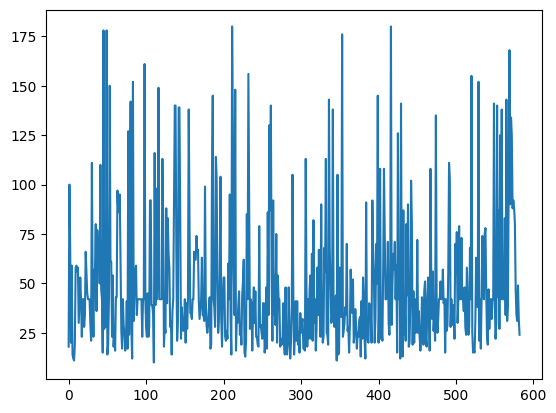

In [158]:
# "Aspartate_Aminotransferase" COlumn 

plt.plot(data.Aspartate_Aminotransferase)
plt.show()

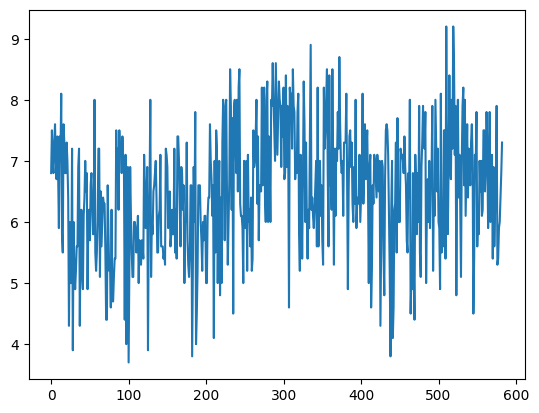

In [161]:
# "Total_Protiens" COlumn 

plt.plot(data.Total_Protiens)
plt.show()

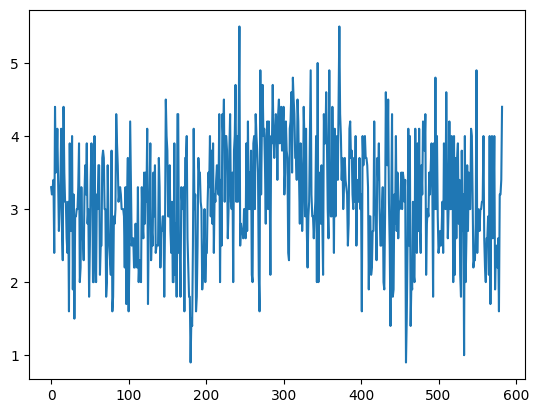

In [166]:
# "Albumin" COlumn 

plt.plot(data.Albumin)
plt.show()

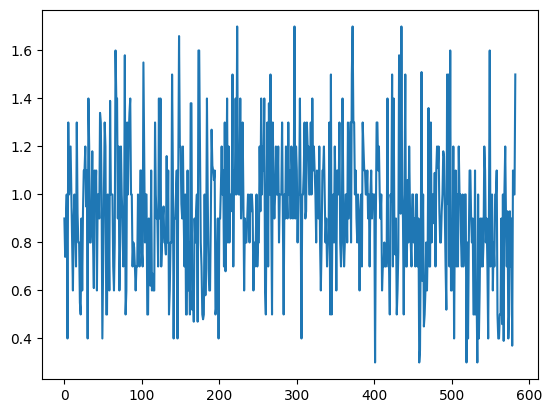

In [167]:
# "Albumin_and_Globulin_Ratio" COlumn 

plt.plot(data.Albumin_and_Globulin_Ratio)
plt.show()

# 5.2 Pie Chart of each column

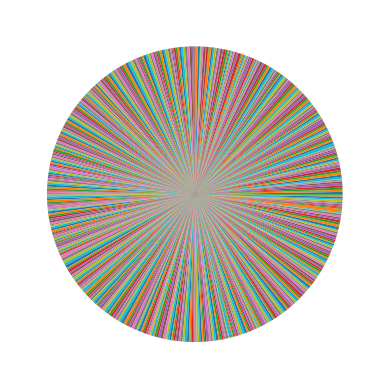

In [124]:
# "Age" Column

plt.pie(data.Age)
plt.show()

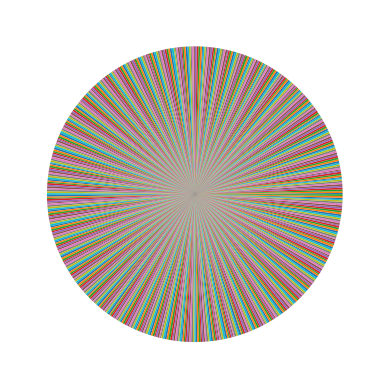

In [148]:
# "Total_Bilirubin" Column

plt.pie(data.Total_Bilirubin)
plt.show()

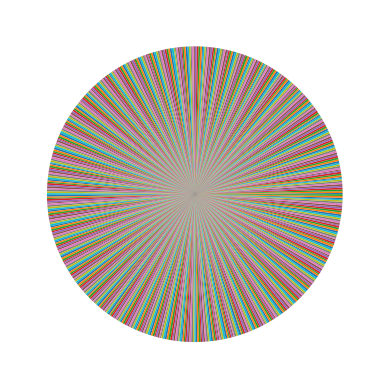

In [152]:
# "Direct_Bilirubin" Column

plt.pie(data.Direct_Bilirubin)
plt.show()

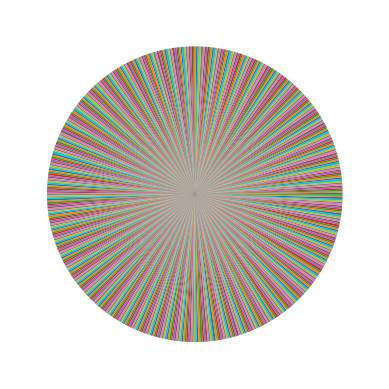

In [154]:
# "Alkaline_Phosphotase" Column

plt.pie(data.Alkaline_Phosphotase)
plt.show()

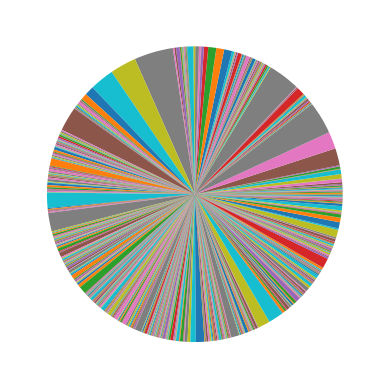

In [156]:
# "Alamine_Aminotransferase" Column

plt.pie(data.Alamine_Aminotransferase)
plt.show()

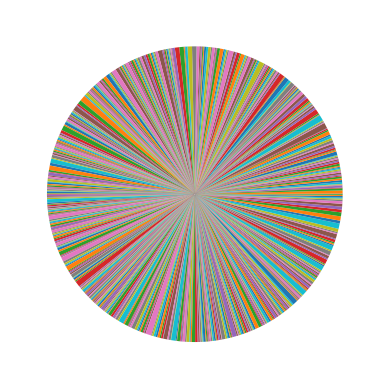

In [159]:
# "Aspartate_Aminotransferase" Column

plt.pie(data.Aspartate_Aminotransferase)
plt.show()

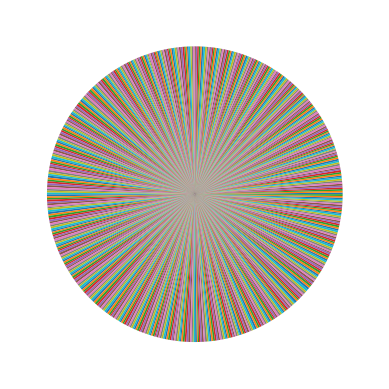

In [162]:
# "Total_Protiens" Column

plt.pie(data.Total_Protiens)
plt.show()

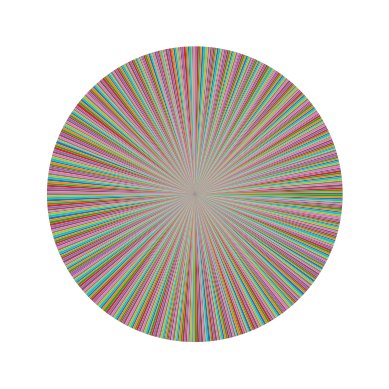

In [165]:
# "Albumin" Column

plt.pie(data.Albumin)
plt.show()

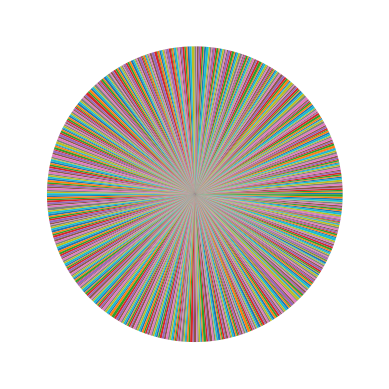

In [168]:
# "Albumin_and_Globulin_Ratio" Column

plt.pie(data.Albumin_and_Globulin_Ratio)
plt.show()

# 5.3 Distribution plot of each column

C:\Users\smile\AppData\Local\Temp\ipykernel_12016\3767967868.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age)


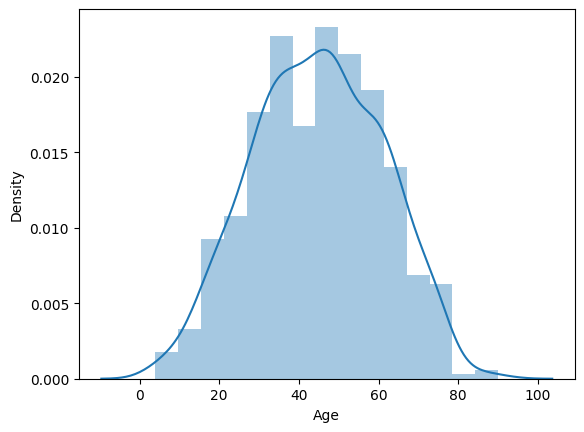

In [150]:
# "Age" COlumn

sns.distplot(data.Age)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_12016\95040016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Total_Bilirubin)


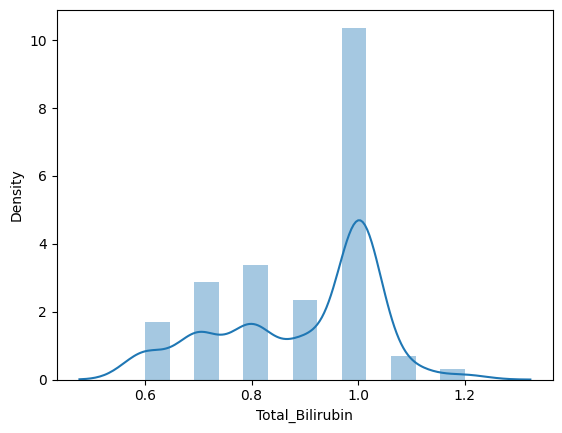

In [151]:
# "Total_Bilirubin" COlumn

sns.distplot(data.Total_Bilirubin)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_12016\4233420342.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Direct_Bilirubin)


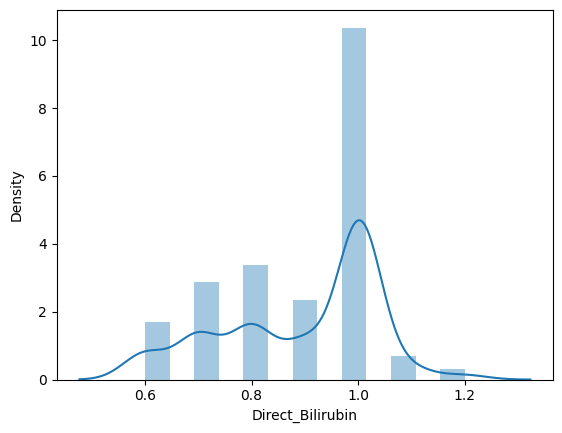

In [153]:
# "Direct_Bilirubin" COlumn

sns.distplot(data.Direct_Bilirubin)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_12016\2957062260.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Alkaline_Phosphotase)


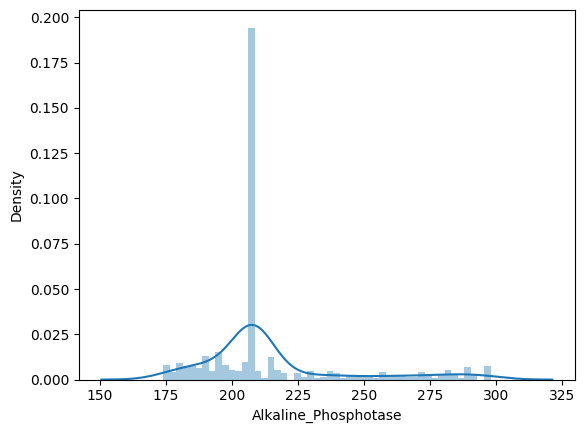

In [155]:
# "Alkaline_Phosphotase" COlumn

sns.distplot(data.Alkaline_Phosphotase)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_12016\414205986.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Alamine_Aminotransferase)


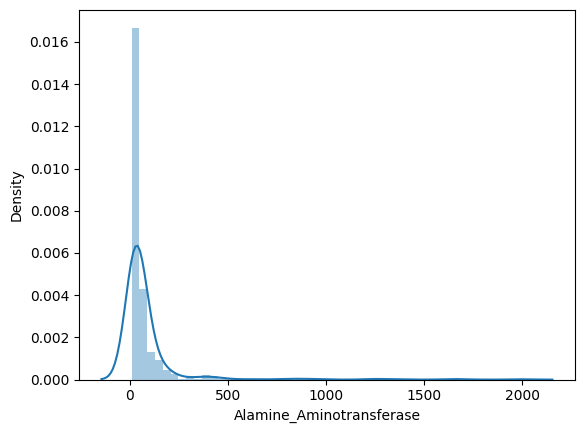

In [157]:
# "Alamine_Aminotransferase" COlumn

sns.distplot(data.Alamine_Aminotransferase)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_12016\829912051.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Aspartate_Aminotransferase)


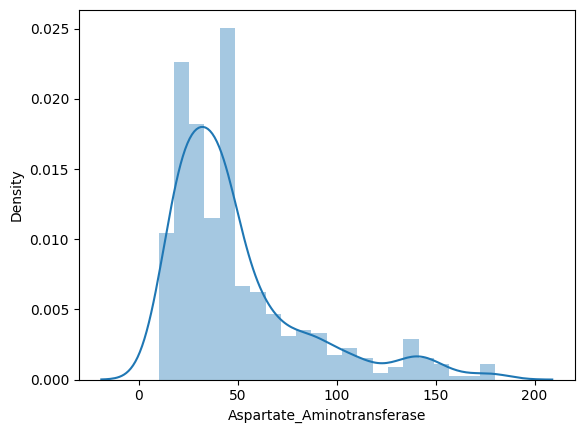

In [160]:
# "Aspartate_Aminotransferase" COlumn

sns.distplot(data.Aspartate_Aminotransferase)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_12016\1789377955.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Total_Protiens)


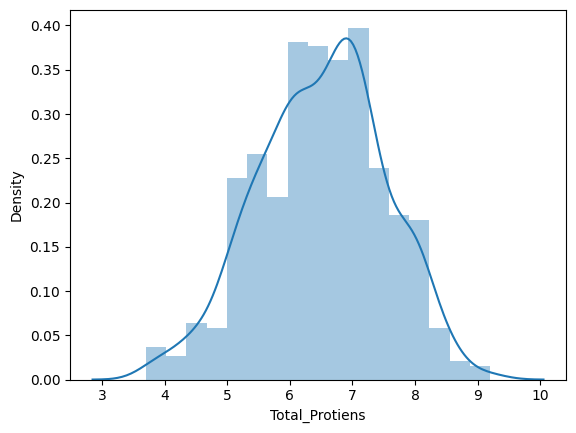

In [163]:
# "Total_Protiens" COlumn

sns.distplot(data.Total_Protiens)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_12016\1998928814.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Albumin)


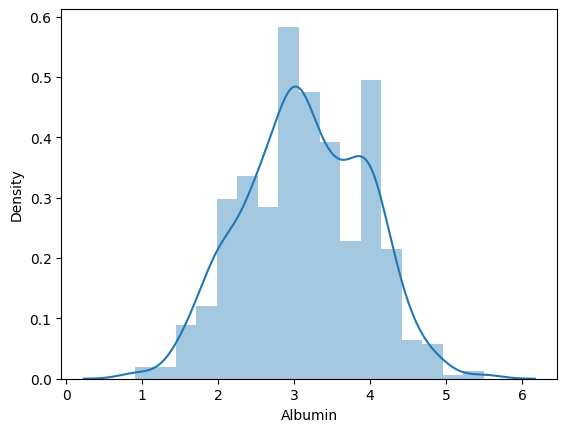

In [164]:
# "Albumin" COlumn

sns.distplot(data.Albumin)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_12016\482387912.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Albumin_and_Globulin_Ratio)


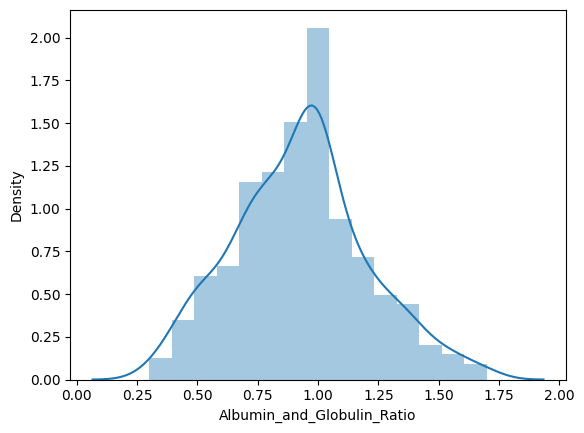

In [169]:
# "Albumin_and_Globulin_Ratio" COlumn

sns.distplot(data.Albumin_and_Globulin_Ratio)
plt.show()

# 5.4 Correlation and HeatMap

In [171]:
# Checking the correlation of columns

data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.112972,0.112972,0.006648,-0.086883,-0.006208,-0.174480,-0.265924,-0.233368,-0.137351
Gender,0.056560,1.000000,0.173762,0.173762,0.090610,0.082332,0.148747,-0.093144,-0.093799,-0.005399,-0.082416
Total_Bilirubin,0.112972,0.173762,1.000000,1.000000,0.132256,0.180780,0.239118,0.061327,-0.070071,-0.144645,-0.197392
Direct_Bilirubin,0.112972,0.173762,1.000000,1.000000,0.132256,0.180780,0.239118,0.061327,-0.070071,-0.144645,-0.197392
Alkaline_Phosphotase,0.006648,0.090610,0.132256,0.132256,1.000000,0.167870,0.184261,-0.078617,-0.165140,-0.177007,-0.200084
Alamine_Aminotransferase,-0.086883,0.082332,0.180780,0.180780,0.167870,1.000000,0.066062,-0.038942,-0.029742,0.012516,-0.163416
Aspartate_Aminotransferase,-0.006208,0.148747,0.239118,0.239118,0.184261,0.066062,1.000000,-0.112848,-0.159800,-0.171320,-0.204218
Total_Protiens,-0.174480,-0.093144,0.061327,0.061327,-0.078617,-0.038942,-0.112848,1.000000,0.741916,0.239161,0.021968
Albumin,-0.265924,-0.093799,-0.070071,-0.070071,-0.165140,-0.029742,-0.159800,0.741916,1.000000,0.751601,0.161388
Albumin_and_Globulin_Ratio,-0.233368,-0.005399,-0.144645,-0.144645,-0.177007,0.012516,-0.171320,0.239161,0.751601,1.000000,0.178866


In [4]:
# Visual representation of correlation (HeatMap)

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

# There is no much correlation among target column and independent column

NameError: name 'data' is not defined

<Figure size 800x800 with 0 Axes>

In [6]:
# finding the most correlated independent column with target variable

data.corr().Dataset.sort_values(ascending=False)

#here column "Albumin_and_Globulin_Ratio " is somewhat correlated with the target column

Dataset                       1.000000
Albumin_and_Globulin_Ratio    0.163131
Albumin                       0.161388
Total_Protiens                0.035008
Age                          -0.137351
Aspartate_Aminotransferase   -0.151934
Alamine_Aminotransferase     -0.163416
Alkaline_Phosphotase         -0.184866
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Name: Dataset, dtype: float64

In [181]:
# multicollinearity

# here multicollinearity occurs between columns "Total_Bilirubin" and "Direct_Bilirubin"
#so drop column "Direct_Bilirubin" to eliminate multicollinearity

data=data.drop(columns=['Direct_Bilirubin'],axis=1)
#this error occcured because i run the run command to times

KeyError: "['Direct_Bilirubin'] not found in axis"

In [183]:
data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187.0,16,18.0,6.8,3.3,0.90,1
1,62,1,1.0,208.0,64,100.0,7.5,3.2,0.74,1
2,62,1,1.0,208.0,60,68.0,7.0,3.3,0.89,1
3,58,1,1.0,182.0,14,20.0,6.8,3.4,1.00,1
4,72,1,1.0,195.0,27,59.0,7.3,2.4,0.40,1


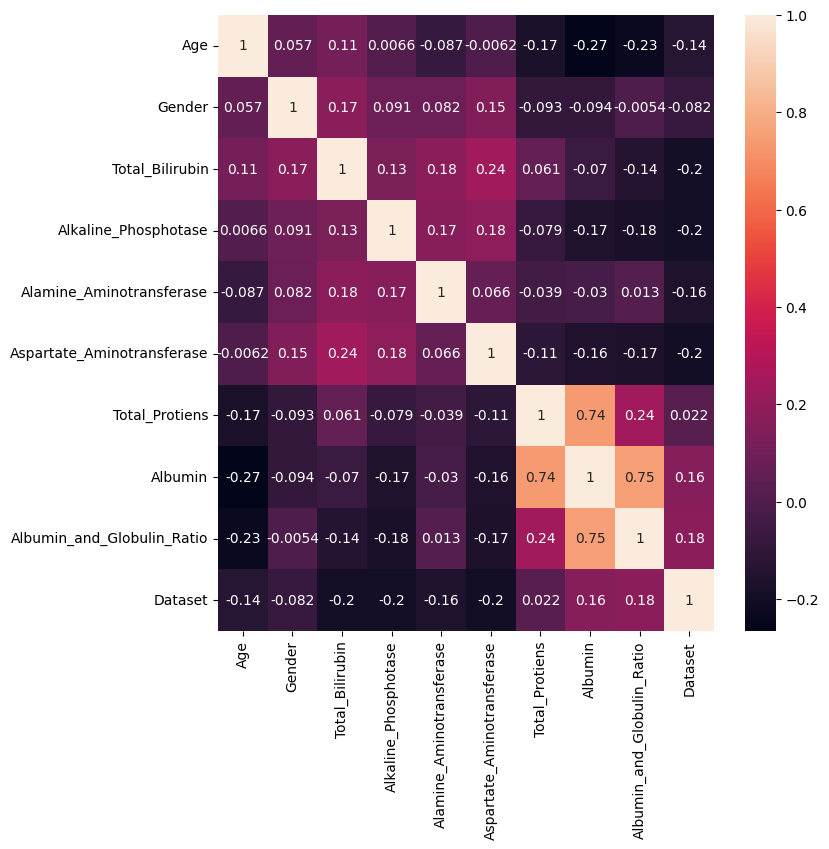

In [184]:
# Heat Map

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

# no multicollinearity occurs here

In [185]:
#writing the preprocessed data into a csv file
data.to_csv('Preprocessed_Data.csv')